In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score
from tqdm import tqdm

dimension de X : (100, 2)
dimension de y : (100, 1)


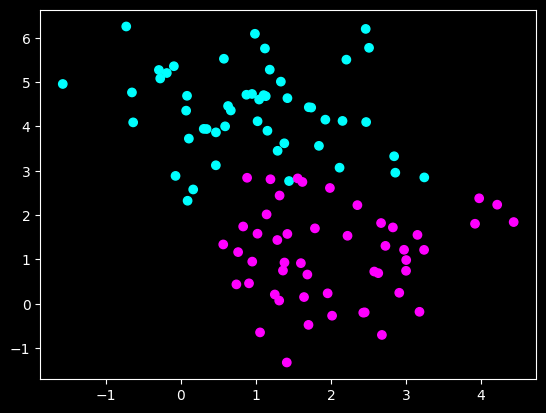

In [2]:
X, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=0)
y = y.reshape((y.shape[0], 1))

print('dimension de X :', X.shape)
print('dimension de y :', y.shape)

plt.style.use('dark_background')
plt.scatter(X[:,0], X[:,1], c=y, cmap='cool')
plt.show()

In [3]:
def initialisation(n1, n0):
  W1 = np.random.randn(n1, n0)
  b = np.random.randn(1)
  return (W, b)

In [4]:
def model(X, W, b):
  Z = X.dot(W) + b
  A = 1 / (1+np.exp(-Z))
  return A

In [5]:
def log_loss(A, y):
  epsilon = 1e-15
  return 1/len(y) * np.sum(-y * np.log(A + epsilon) - (1 - y) * np.log(1-A + epsilon))

In [6]:
def gradients(A, X, y):
  dW = 1 /len(y) * np.dot(X.T, A - y)
  db = 1 / len(y) * np.sum(A - y)
  return (dW, db)

In [7]:
def update(dW, db, W, b, learning_rate):
  W = W - learning_rate * dW
  b = b - learning_rate * db
  return (W, b)

In [8]:
def predict(X, W, b):
    A = model(X, W, b)
    return A >= 0.5


In [9]:
def artificial_neuron(X_train, y_train, X_test, y_test, learning_rate = 0.1, n_iter = 100):
    # initialisation W, b
    W, b = initialisation(X_train)

    train_loss = []
    train_acc = []
    test_loss = []
    test_acc = []
    
    for i in tqdm(range(n_iter), position=0, leave=True):
        A = model(X_train, W, b)

        if i %10 == 0:
            # Train
            train_loss.append(log_loss(A, y_train))
            y_pred = predict(X_train, W, b)
            train_acc.append(accuracy_score(y_train, y_pred))

            # Test
            A_test = model(X_test, W, b)
            test_loss.append(log_loss(A_test, y_test))
            y_pred = predict(X_test, W, b)
            test_acc.append(accuracy_score(y_test, y_pred))

        # mise a jour
        dW, db = gradients(A, X_train, y_train)
        W, b = update(dW, db, W, b, learning_rate)


    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(train_loss, label='train loss')
    plt.plot(test_loss, label='test loss')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(train_acc, label='train acc')
    plt.plot(test_acc, label='test acc')
    plt.legend()
    plt.show()

    return (W, b)

W, b = artificial_neuron(X_train, y_train, X_test, y_test)

new_plant = np.array([2, 1])

x0 = np.linspace(-1, 4, 100)
x1 = (-W[0] * x0 - b) / W[1]

plt.scatter(X[:,0], X[:,1], c=y, cmap='summer')
plt.scatter(new_plant[0], new_plant[1], c='r')
plt.plot(x0, x1, c='orange', lw=2)

plt.show()

predict(new_plant, W, b)

# Chats et chiens

In [10]:
from utilities import *

In [11]:
X_train, y_train, X_test, y_test = load_data()

/home/josh/.local/lib/python3.10/site-packages/matplotlib/text.py:1241: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


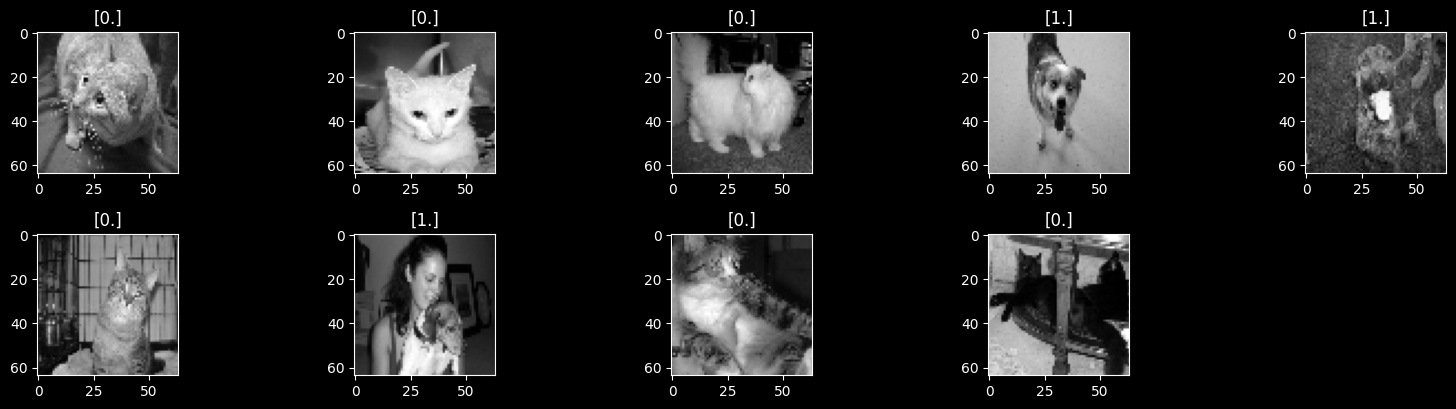

In [12]:
plt.figure(figsize=(16,8))
for i in range(1, 10):
    plt.subplot(4, 5, i)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(y_train[i])
    plt.tight_layout()
plt.show()

# Entrainement du Modele :

In [13]:
X_train_reshape = X_train.reshape(X_train.shape[0], -1)/X_train.max()
X_train_reshape.shape

(1000, 4096)

In [14]:
X_test_reshape = X_test.reshape(X_test.shape[0], -1)/X_train.max()
X_test_reshape.shape

(200, 4096)

100%|██████████| 10000/10000 [00:52<00:00, 190.34it/s]


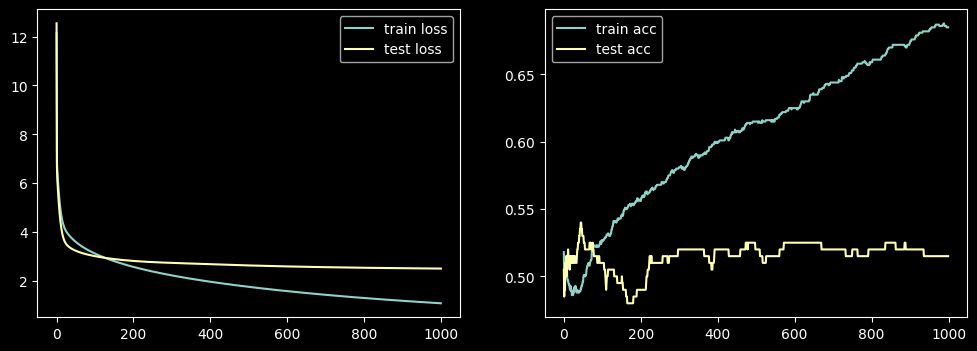

In [15]:
W,b = artificial_neuron(X_train_reshape, y_train, X_test_reshape, y_test,  learning_rate=0.01, n_iter=10000)